In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deployment de Modelos Utilizando MLFlow

Exemplo da AULA - BIG DATA E DEPLOYMENT DE MODELOES - Prof. Helder Prado <BR>
AULA MINISTRADA EM R E TRADUZIDA PARA PYTHON COMO FORMA DE APRENDIZADO.

Ferramenta de Gerenciamento e Deployment de Modelos 

Construir Modelo de Multinível para ser acessado através de uma API.


**Commandos:**

**Entrar no diretório dos projeto (Anaconda Prompt):**<br>
cd /d C:\Users\leomu\OneDrive\MBA\Big Data\python

**Cria Ambiente** <br>
python -m venv venv
    
**Ativa Ambiente** <br>
.\venv\scripts\activate

**Instala MLFLOW** <br>
pip install mlflow==2.3.0

**Inicia MLFLOW** <br>
mlflow ui


## Contexto

Base Estudante Escola

Desempenho no vestibular <br>
Quantidade de horas de estudos semanais <br>
Tempo de Experiência médio dos professores na referida escola 

In [6]:
df_escola = pd.read_csv(r'bases\estudante_escola.csv')
df_escola['estudante'] = df_escola['estudante'].astype('category')
df_escola['escola'] = df_escola['escola'].astype('category')
df_escola

,estudante,escola,desempenho,horas,texp
0,1,1,25.0,11,3.6
1,2,1,52.0,23,3.6
2,3,1,52.0,25,3.6
3,4,1,30.0,14,3.6
4,5,1,51.0,24,3.6
...,...,...,...,...,...
353,354,10,46.5,28,3.9
354,355,10,21.0,9,3.9
355,356,10,42.0,27,3.9
356,357,10,14.0,7,3.9


# Análise Descritiva

In [3]:
df_escola.describe().round(2)

,desempenho,horas,texp
count,358.00,358.00,358.00
mean,41.55,19.00,5.16
std,23.23,6.37,3.68
min,6.50,4.00,1.90
25%,21.00,14.00,1.90
50%,35.50,20.00,3.60
75%,59.00,24.00,7.50
max,100.00,31.00,13.00


In [4]:
df_escola.groupby('escola')['estudante'].count().reset_index()

,escola,estudante
0,1,47
1,2,25
2,3,48
3,4,20
4,5,48
5,6,30
6,7,28
7,8,35
8,9,44
9,10,33


In [5]:
#Desempenho Médio por Escola
desempenho_medio = df_escola.groupby('escola')['desempenho'].mean().reset_index()
desempenho_medio

,escola,desempenho
0,1,36.765957
1,2,21.400000
2,3,67.125000
3,4,55.325000
4,5,19.270833
5,6,33.966667
6,7,57.532143
7,8,75.428571
8,9,18.556818
9,10,38.590909


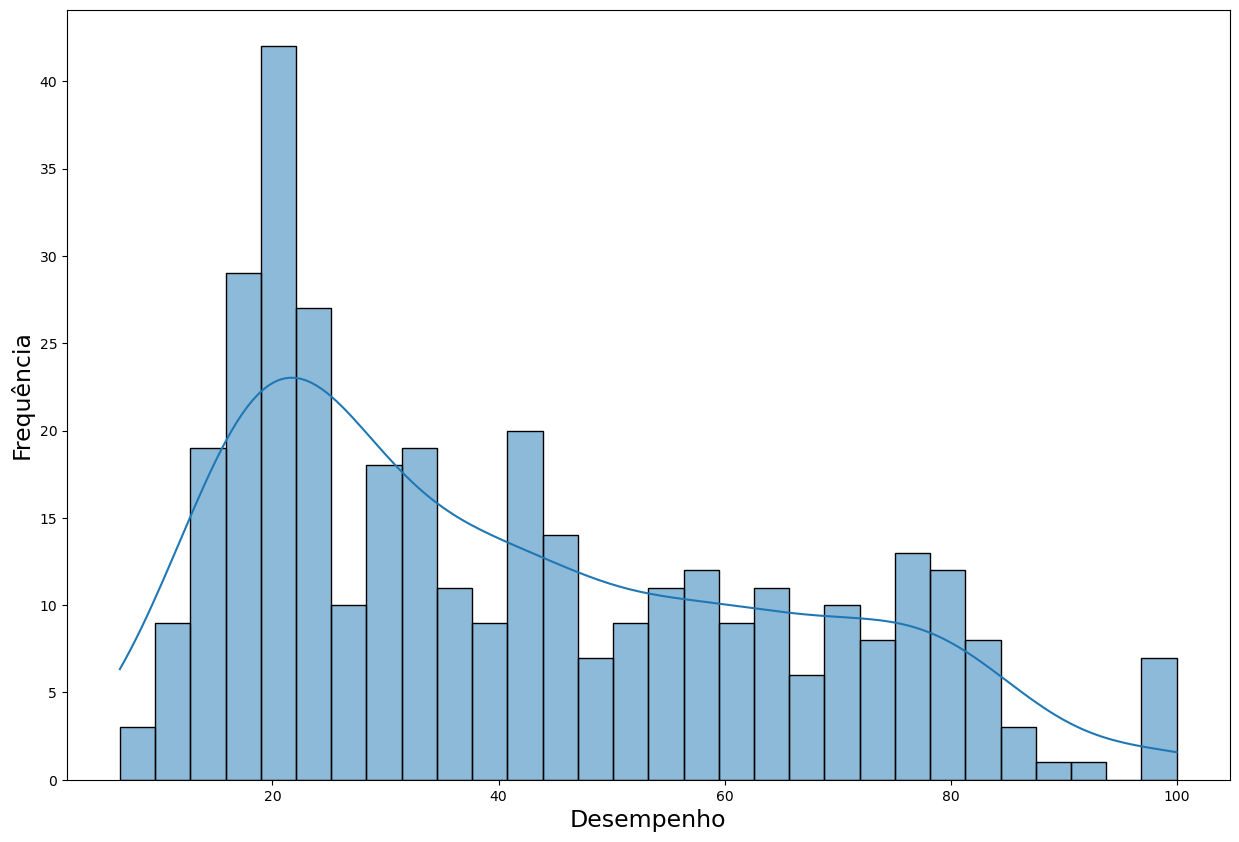

In [6]:
from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.histplot(df_escola.desempenho, kde=True, bins=30)
plt.xlabel('Desempenho', fontsize=17)
plt.ylabel('Frequência', fontsize=17)
plt.show()

<Figure size 1500x1000 with 0 Axes>

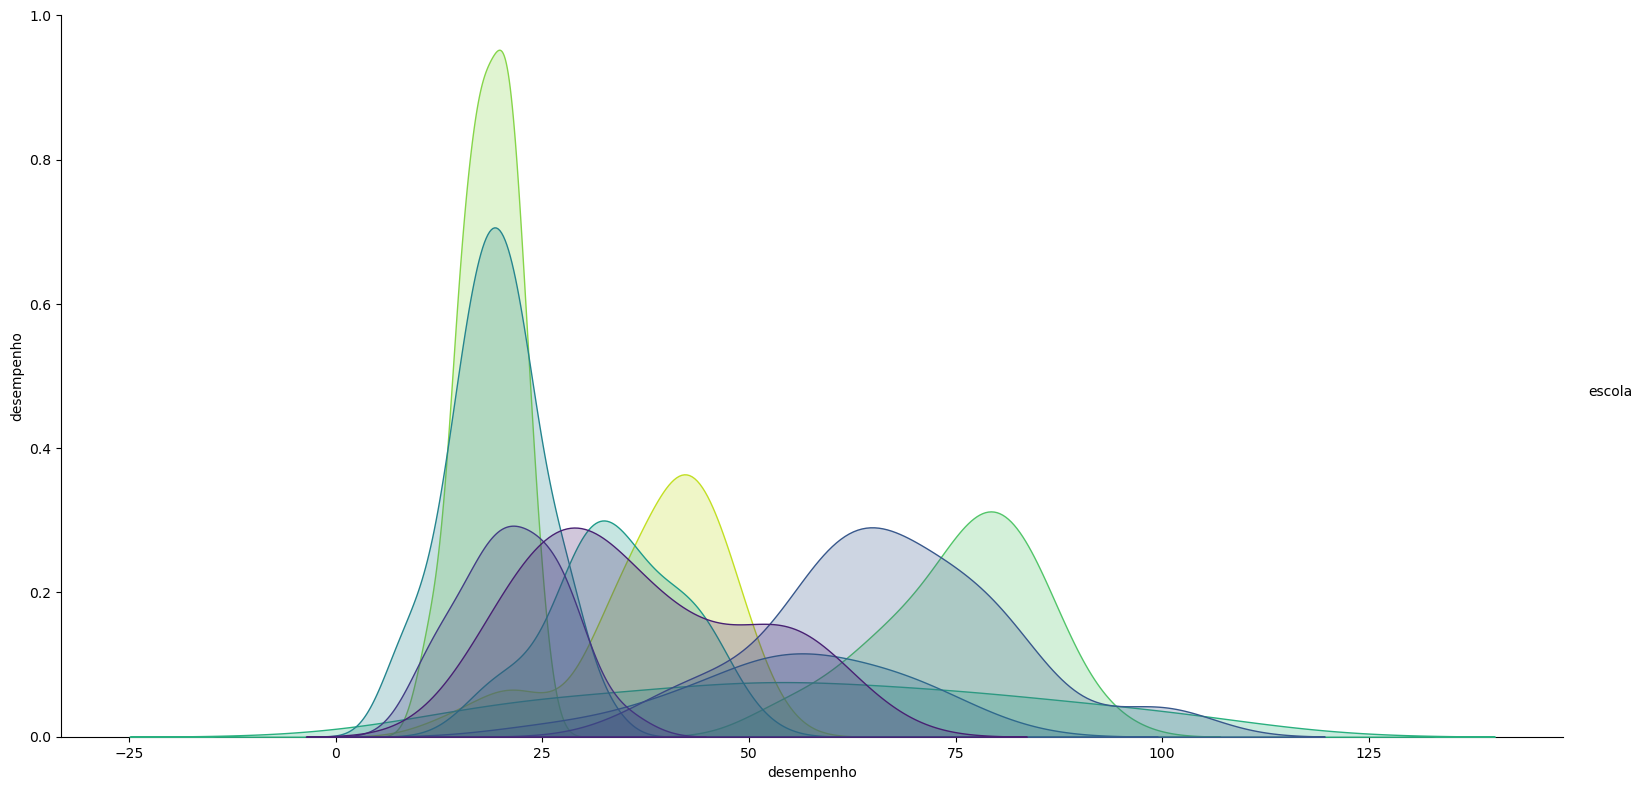

In [7]:
plt.figure(figsize=(15,10))
sns.pairplot(df_escola[['escola','desempenho']], hue='escola', height=8,
             aspect=2, palette='viridis')
plt.xlabel('Desempenho', fontsize=17)
plt.ylabel('Frequência', fontsize=17)
plt.show()

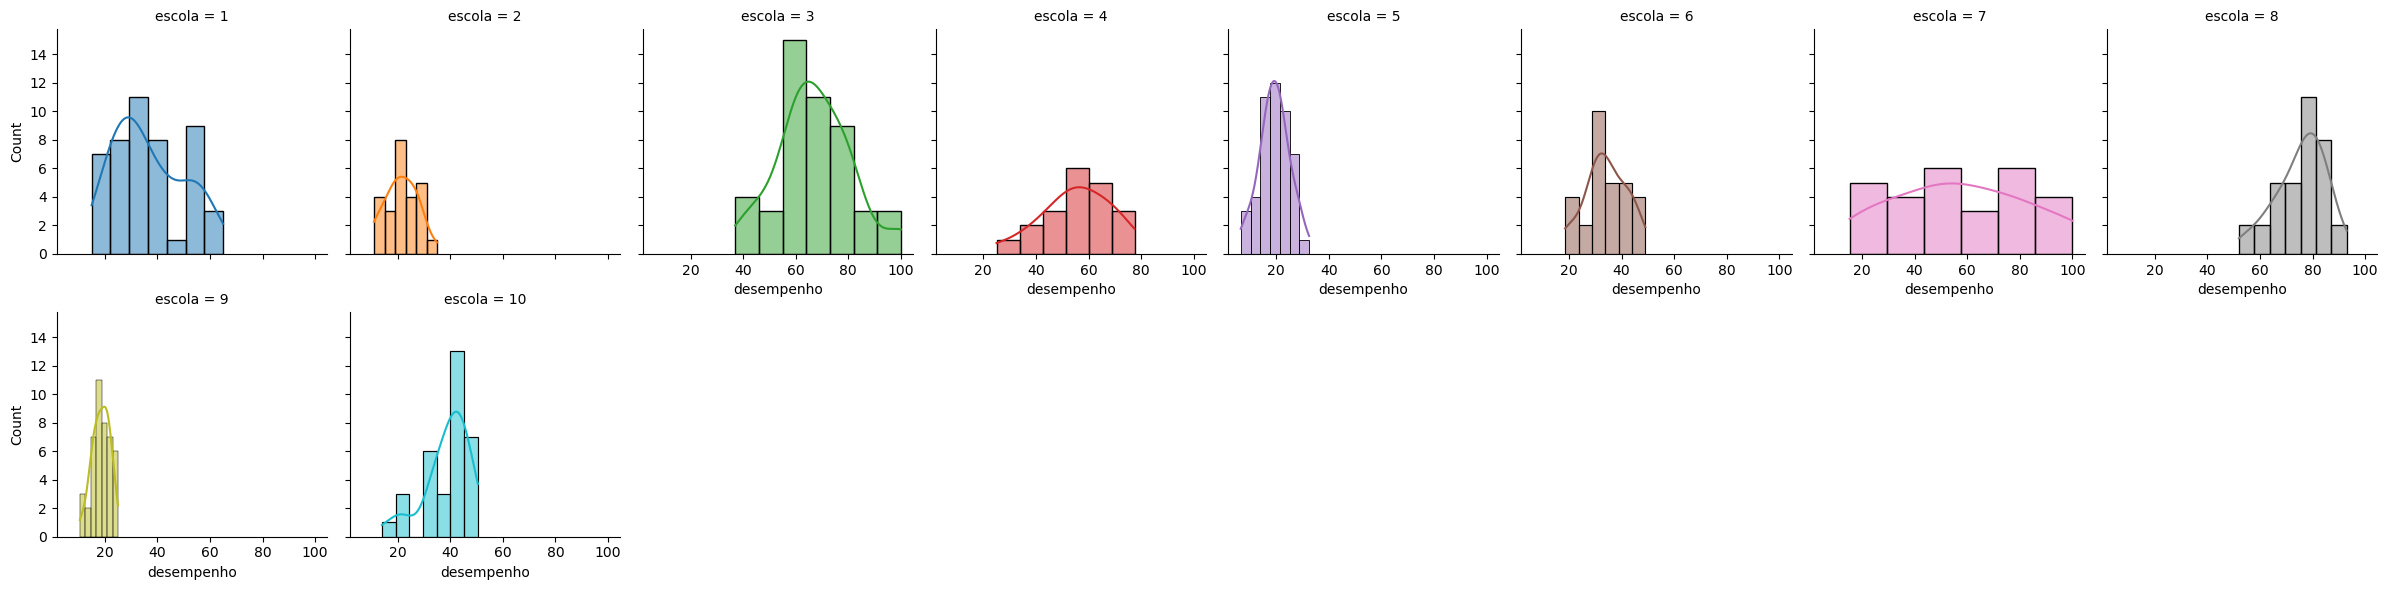

In [8]:
g = sns.FacetGrid(df_escola, col='escola', col_wrap=8, hue='escola')
g.map_dataframe(sns.histplot, kde=True, x='desempenho')
plt.show()

In [9]:
df_escola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   estudante   358 non-null    category
 1   escola      358 non-null    category
 2   desempenho  358 non-null    float64 
 3   horas       358 non-null    int64   
 4   texp        358 non-null    float64 
dtypes: category(2), float64(2), int64(1)
memory usage: 20.8 KB


# Modelagem

Utilizando MLFlow encapsulando os Modelos

## Conectando MLFlow

Conectando para gerenciar todo o ciclo de vida do modelo

In [4]:
import mlflow

#Conectando MLFlow
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [11]:

# Criando Primeiro Experimento
mlflow.create_experiment('modelo_desempenho_estudante')

# Acionando o Experimento - Informa qual Experimento estamos usando no momento
mlflow.set_experiment('modelo_desempenho_estudante')

<Experiment: artifact_location='mlflow-artifacts:/114066202219217713', creation_time=1683828446277, experiment_id='114066202219217713', last_update_time=1683828446277, lifecycle_stage='active', name='modelo_desempenho_estudante', tags={}>

### Estimação do Modelo HLM2 Nulo no MLFlow

### Iniciando a corrida no MLFlow

In [12]:
#Iniciando Primeira Corrida do experimento
mlflow.start_run()

<ActiveRun: >

In [13]:
# Definindo o Nome da Corrida
mlflow.set_tag('mlflow.runName', 'Modelo HLM2 Nulo')

### Adicionando os Parâmetros do Modelo (INPUTs)

In [14]:
mlflow.log_param('MODELO', 'MULTINÍVEL')
mlflow.log_param('FORMULA', 'desempenho ~ 1')

'desempenho ~ 1'

### Estimando Modelo Nulo

In [15]:
#https://www.statsmodels.org/stable/mixed_linear.html
import statsmodels.api as sm

modelo_nulo_hlm2 = sm.MixedLM.from_formula("desempenho ~ 1", 
                                           df_escola, 
                                           groups='escola',
                                          re_formula = '1').fit()

# Criando variável de Resultado
output_modelo = modelo_nulo_hlm2.summary()

In [16]:
# Coletando os Fitted Values
y_hat_modelo_nulo = modelo_nulo_hlm2.fittedvalues
df_escola['y_hat_modelo_nulo'] = y_hat_modelo_nulo

In [17]:
# Métricas da Performance do Modelo

loglike_modelo_nulo = modelo_nulo_hlm2.llf
aic_modelo_nulo = modelo_nulo_hlm2.aic

### Adicionando as Métricas do Modelo (OUTPUTs)

In [18]:
mlflow.log_metric('LogLike', loglike_modelo_nulo)
mlflow.log_metric('AIC', aic_modelo_nulo)

### Criando Artefatos

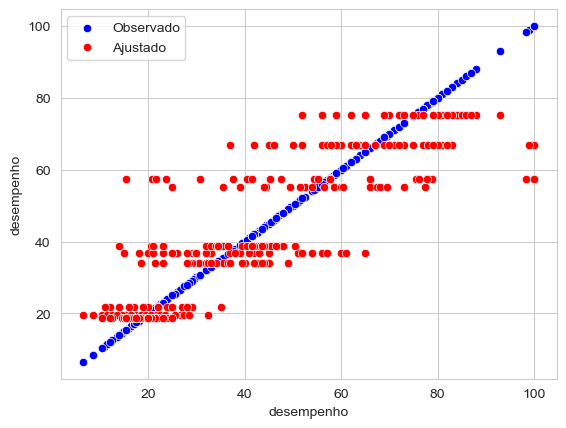

In [19]:
sns.set_style('whitegrid')
sns.scatterplot(data=df_escola, x='desempenho', y='desempenho', color='blue', label='Observado')
sns.scatterplot(data=df_escola, x='desempenho', y='y_hat_modelo_nulo', color='red', label='Ajustado')
plt.legend()

#Salvando Figura para exportar para MLFLOW
plt.savefig('modelo_nulo.jpg')
plt.show()

In [20]:
# Adicionando o Gráfico como Artefato na Corrida

mlflow.log_artifact('modelo_nulo.jpg')

### Criando Função Para Prever o Moelo no MLFLOW

In [21]:
# Função Que retorna previsão baseado na variável explicativa (modelo nulo não possui)
def modelo_estudante_escola(x):
    return modelo_nulo_hlm2.predict(X)
    

In [22]:
# Cria Log do Modelo no MLFLOW

mlflow.sklearn.log_model(modelo_estudante_escola, 'modelo_HLM2_estudante_escola_nulo')

2023/05/11 15:10:01 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


### Finalizando a Corrida

In [23]:
mlflow.end_run()

# Estimação do Modelo HLM2 Nulo Encapsulado no MLFLOW

LogLike: -1416.0074
AIC: nan


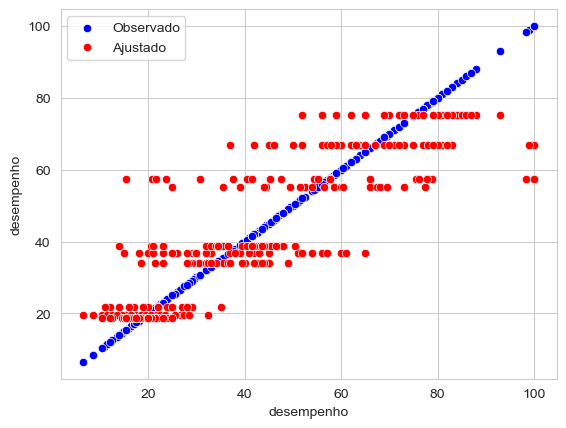

2023/05/11 15:11:01 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [24]:
with mlflow.start_run():
    
    # Definindo o Nome da Corrida
    mlflow.set_tag('mlflow.runName', 'Modelo HLM2 Nulo - Encapsulado')

    # Adicionando Parâmetros
    mlflow.log_param('MODELO', 'MULTINÍVEL')
    mlflow.log_param('FORMULA', 'desempenho ~ 1')
    
    # Modelagem
    import statsmodels.api as sm

    modelo_nulo_hlm2 = sm.MixedLM.from_formula("desempenho ~ 1", 
                                               df_escola, 
                                               groups='escola',
                                               re_formula = '1').fit()

        # Criando variável de Resultado
    output_modelo = modelo_nulo_hlm2.summary()
    
    # Coletando os Fitted Values
    y_hat_modelo_nulo = modelo_nulo_hlm2.fittedvalues
    df_escola['y_hat_modelo_nulo'] = y_hat_modelo_nulo
    
    # Métricas da Performance do Modelo
    loglike_modelo_nulo = modelo_nulo_hlm2.llf
    aic_modelo_nulo = modelo_nulo_hlm2.aic
    
    # Print dos resultados para acompanhamento no python
    print(f'LogLike: {loglike_modelo_nulo:.4f}')
    print(f'AIC: {aic_modelo_nulo:.4f}')
    
    
    
    # Artefatos do Modelo
    sns.set_style('whitegrid')
    sns.scatterplot(data=df_escola, x='desempenho', y='desempenho', color='blue', label='Observado')
    sns.scatterplot(data=df_escola, x='desempenho', y='y_hat_modelo_nulo', color='red', label='Ajustado')
    plt.legend()

        #Salvando Figura para exportar para MLFLOW
    plt.savefig('modelo_nulo.jpg')
    plt.show()
    
    # Adicionando o Gráfico como Artefato na Corrida
    mlflow.log_artifact('modelo_nulo.jpg')
    
    # Adiciona as Metricas no MLFLOW
    mlflow.log_metric('LogLike', loglike_modelo_nulo)
    mlflow.log_metric('AIC', aic_modelo_nulo)
    
    # Função Que retorna previsão baseado na variável explicativa (modelo nulo não possui)
    def pacote_modelo_encapsulado(x):
        return modelo_nulo_hlm2.predict(x)
    
    # Cria Log do Modelo no MLFLOW
    mlflow.sklearn.log_model(pacote_modelo_encapsulado, 'modelo_hlm2_encapsulado_estudante_escola')

# Estimação do Modelo OLS Encapsulado no MLFLOW

LogLike: -1323.2058
AIC: 2652.4116
R2: 0.8233


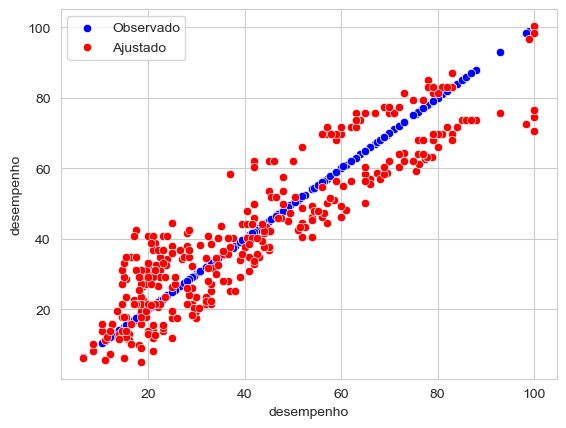

2023/05/11 15:11:46 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [25]:
with mlflow.start_run():
    
    # Definindo o Nome da Corrida
    mlflow.set_tag('mlflow.runName', 'Modelo Linear texp + horas')

    # Adicionando Parâmetros
    mlflow.log_param('MODELO', 'LINEAR')
    mlflow.log_param('FORMULA', 'desempenho ~ texp + horas')
    
    # Modelagem
    import statsmodels.api as sm

    modelo_encapsulado = sm.OLS.from_formula(formula="desempenho ~ texp + horas", 
                                               data = df_escola).fit()

        # Criando variável de Resultado
    output_modelo = modelo_encapsulado.summary()
    
    # Coletando os Fitted Values
    y_hat = modelo_encapsulado.fittedvalues
    df_escola['y_hat'] = y_hat
    
    # Métricas da Performance do Modelo
    loglike_encapsulado = modelo_encapsulado.llf
    aic_modelo_encapsulado = modelo_encapsulado.aic
    r2_modelo_encapsulado = modelo_encapsulado.rsquared
    
    # Print dos resultados para acompanhamento no python
    print(f'LogLike: {loglike_encapsulado:.4f}')
    print(f'AIC: {aic_modelo_encapsulado:.4f}')
    print(f'R2: {r2_modelo_encapsulado:.4f}')
    
    
    
    # Artefatos do Modelo
    sns.set_style('whitegrid')
    sns.scatterplot(data=df_escola, x='desempenho', y='desempenho', color='blue', label='Observado')
    sns.scatterplot(data=df_escola, x='desempenho', y='y_hat', color='red', label='Ajustado')
    plt.legend()

        #Salvando Figura para exportar para MLFLOW
    plt.savefig('modelo_encapsulado.jpg')
    plt.show()
    
    # Adicionando o Gráfico como Artefato na Corrida
    mlflow.log_artifact('modelo_encapsulado.jpg')
    
    # Adiciona as Metricas no MLFLOW
    mlflow.log_metric('LogLike', loglike_encapsulado)
    mlflow.log_metric('AIC', aic_modelo_encapsulado)
    mlflow.log_metric('R2', r2_modelo_encapsulado)
    
    # Função Que retorna previsão baseado na variável explicativa (modelo nulo não possui)
    def pacote_modelo_encapsulado(x):
        return modelo_encapsulado.predict(x)
    
    # Cria Log do Modelo no MLFLOW
    mlflow.sklearn.log_model(pacote_modelo_encapsulado, 'modelo_OLS_encapsulado_estudante_escola')

# DEPLOYMENT DO MODELO

#### Ciclo de Vida

- ADAPTAÇÃO
- PRODUÇÃO
- ARQUIVADO

## ESTÁGIO DE ADAPTAÇÃO



In [26]:
# Consumindo o Modelo em Fase de Adaptação
modelo_estagio_adaptacao_predict = mlflow.sklearn\
    .load_model('models:/modelo_estudante_escola/staging')

In [35]:
#texp,horas
dados_novos = pd.DataFrame({'texp': [12], 
                            'horas': [20]})

modelo_estagio_adaptacao_predict(dados_novos)

0    81.4555
dtype: float64

## ESTÁGIO DE PRODUÇÃO

In [38]:
# Consumindo o Modelo em Fase de Adaptação
modelo_estagio_producao_predict = mlflow.sklearn\
    .load_model('models:/modelo_estudante_escola/production')

In [39]:
#texp,horas
modelo_estagio_producao_predict(dados_novos)

0    81.4555
dtype: float64

## ESTÁGIO ARQUIVADO

In [80]:
# Consumindo o Modelo em Fase de Adaptação
modelo_estagio_arquivado_predict = mlflow.sklearn\
    .load_model('models:/modelo_estudante_escola/archived')

In [81]:
#texp,horas
modelo_estagio_producao_predict(dados_novos)

0    81.4555
dtype: float64

# MELHORANDO MODELO HLM2

## Intercepto Aleatório

LogLike: -1155.2466
AIC: nan


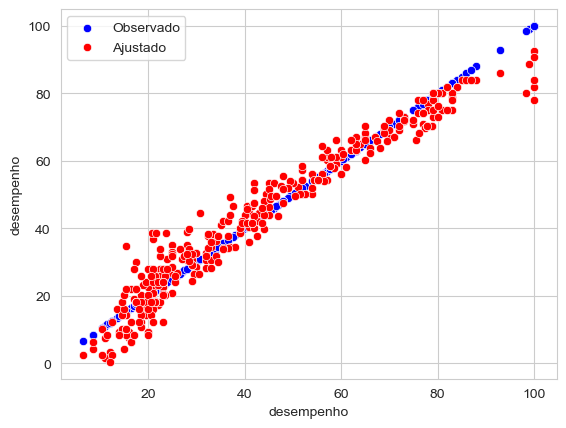

2023/05/11 15:21:55 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [40]:
with mlflow.start_run():
    
    # Definindo o Nome da Corrida
    mlflow.set_tag('mlflow.runName', 'Modelo HLM2 Interceptos Aleatórios')

    # Adicionando Parâmetros
    mlflow.log_param('MODELO', 'MULTINÍVEL')
    mlflow.log_param('FORMULA', 'desempenho ~ horas + (1|escola)')
    
    # Modelagem
    import statsmodels.api as sm

    modelo_encapsulado = sm.MixedLM.from_formula("desempenho ~ horas", 
                                                       df_escola, 
                                                       groups='escola', 
                                                       re_formula='1').fit()

        # Criando variável de Resultado
    output_modelo = modelo_encapsulado.summary()
    
    # Coletando os Fitted Values
    y_hat = modelo_encapsulado.fittedvalues
    df_escola['y_hat'] = y_hat
    
    # Métricas da Performance do Modelo
    loglike_encapsulado = modelo_encapsulado.llf
    aic_modelo_encapsulado = modelo_encapsulado.aic
    #r2_modelo_encapsulado = modelo_encapsulado.rsquared
    
    # Print dos resultados para acompanhamento no python
    print(f'LogLike: {loglike_encapsulado:.4f}')
    print(f'AIC: {aic_modelo_encapsulado:.4f}')
    #print(f'R2: {r2_modelo_encapsulado:.4f}')
    
    
    
    # Artefatos do Modelo
    sns.set_style('whitegrid')
    sns.scatterplot(data=df_escola, x='desempenho', y='desempenho', color='blue', label='Observado')
    sns.scatterplot(data=df_escola, x='desempenho', y='y_hat', color='red', label='Ajustado')
    plt.legend()

        #Salvando Figura para exportar para MLFLOW
    plt.savefig('modelo_encapsulado.jpg')
    plt.show()
    
    # Adicionando o Gráfico como Artefato na Corrida
    mlflow.log_artifact('modelo_encapsulado.jpg')
    
    # Adiciona as Metricas no MLFLOW
    mlflow.log_metric('LogLike', loglike_encapsulado)
    mlflow.log_metric('AIC', aic_modelo_encapsulado)
    #mlflow.log_metric('R2', r2_modelo_encapsulado)
    
    # Função Que retorna previsão baseado na variável explicativa (modelo nulo não possui)
    def pacote_modelo_encapsulado(x):
        return modelo_encapsulado.predict(x)
    
    # Cria Log do Modelo no MLFLOW
    mlflow.sklearn.log_model(pacote_modelo_encapsulado, 'modelo_hlm2_intercepto')

# Intercepto e Inclinação

LogLike: -906.8028
AIC: nan


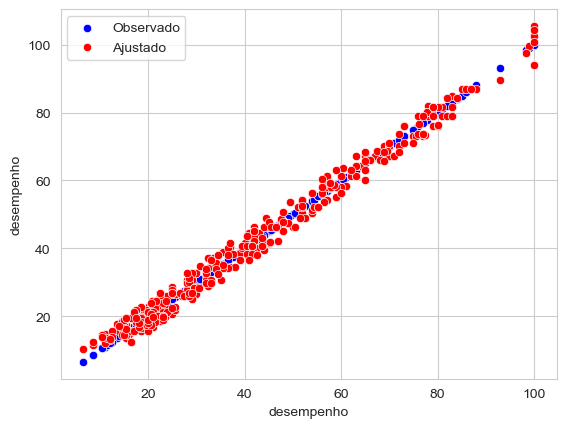

2023/05/11 15:22:22 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [41]:
with mlflow.start_run():
    
    # Definindo o Nome da Corrida
    mlflow.set_tag('mlflow.runName', 'Modelo HLM2 Interc. e Incl. Aleatórios')

    # Adicionando Parâmetros
    mlflow.log_param('MODELO', 'MULTINÍVEL')
    mlflow.log_param('FORMULA', 'desempenho ~ horas + (horas|escola)')
    
    # Modelagem
    import statsmodels.api as sm

    modelo_encapsulado = sm.MixedLM.from_formula("desempenho ~ horas", 
                                                       df_escola, 
                                                       groups='escola', 
                                                       re_formula='horas').fit()

        # Criando variável de Resultado
    output_modelo = modelo_encapsulado.summary()
    
    # Coletando os Fitted Values
    y_hat = modelo_encapsulado.fittedvalues
    df_escola['y_hat'] = y_hat
    
    # Métricas da Performance do Modelo
    loglike_encapsulado = modelo_encapsulado.llf
    aic_modelo_encapsulado = modelo_encapsulado.aic
    #r2_modelo_encapsulado = modelo_encapsulado.rsquared
    
    # Print dos resultados para acompanhamento no python
    print(f'LogLike: {loglike_encapsulado:.4f}')
    print(f'AIC: {aic_modelo_encapsulado:.4f}')
    #print(f'R2: {r2_modelo_encapsulado:.4f}')
    
    
    
    # Artefatos do Modelo
    sns.set_style('whitegrid')
    sns.scatterplot(data=df_escola, x='desempenho', y='desempenho', color='blue', label='Observado')
    sns.scatterplot(data=df_escola, x='desempenho', y='y_hat', color='red', label='Ajustado')
    plt.legend()

        #Salvando Figura para exportar para MLFLOW
    plt.savefig('modelo_encapsulado.jpg')
    plt.show()
    
    # Adicionando o Gráfico como Artefato na Corrida
    mlflow.log_artifact('modelo_encapsulado.jpg')
    
    # Adiciona as Metricas no MLFLOW
    mlflow.log_metric('LogLike', loglike_encapsulado)
    mlflow.log_metric('AIC', aic_modelo_encapsulado)
    #mlflow.log_metric('R2', r2_modelo_encapsulado)
    
    # Função Que retorna previsão baseado na variável explicativa (modelo nulo não possui)
    def pacote_modelo_encapsulado(x):
        return modelo_encapsulado.predict(x)
    
    # Cria Log do Modelo no MLFLOW
    mlflow.sklearn.log_model(pacote_modelo_encapsulado, 'modelo_hlm2_intercepto_inclinacao')

## Testando os Modelo

Modelo OLS foi colocado em fase de Adaptação e o Modelo HLM2 Interceptos e Incli. no estágio de produção

In [43]:
dados_previsao = pd.DataFrame({'horas':[11],
                               'texp':[3.6], 
                               'escola':['1']})

In [44]:
# Consumindo o Modelo em Fase de PRODUÇÃO - HLM2
modelo_estagio_producao_predict = mlflow.sklearn\
    .load_model('models:/modelo_estudante_escola/production')

In [45]:
modelo_estagio_producao_predict(dados_previsao)

0    27.960334
dtype: float64

In [46]:
# Consumindo o Modelo em Fase de ADAPTAÇÃO - OLS
modelo_estagio_adaptacao_predict = mlflow.sklearn\
    .load_model('models:/modelo_estudante_escola/staging')

In [53]:
dados_previsao = pd.DataFrame({'horas':[11],
                               'texp':[3.6]})

In [54]:
modelo_estagio_adaptacao_predict(dados_previsao)

0    17.607928
dtype: float64